In [1]:
import os
import glob
import pywt
import pywt.data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

<h3>NaN/INF to mean</h3>

In [2]:
actvs = ('brushteeth', 'cook', 'drink', 'getintobed', 'nothing', 'sitdown_chair', 'sitdown_sofa',
         'sleeping', 'standup_chair', 'standup_sofa', 'walk', 'washingdishes')

path_csv = os.getcwd() + "\samsung_csi_data_csv"
data_csv = []


for act in actvs:
    lst_csv = glob.glob(f'samsung_csi_data_csv/{act}*')[:40]
    temp = []

    for f in lst_csv:
        fname = os.path.basename(f)
        fpath = os.path.join(path_csv, fname)
        data = pd.read_csv(fpath)
        data.replace([np.inf, -np.inf], np.nan, inplace=True)
        data.fillna(data.mean().mean(), inplace=True)
        temp.append(data)
        
    data_csv.append(temp)

<h3>Data normalization</h3>

In [3]:
data_norm = [tuple(map(lambda x: pd.DataFrame(StandardScaler().fit_transform(x)), i)) for i in data_csv]

data_norm[0][0]

0             1         2         3         4         5         6    \
0   -0.273741 -7.105427e-15  0.885691 -0.109777  0.750845 -0.887268  0.237856   
1    0.975658 -7.105427e-15  0.292936 -1.321834  0.234324  0.597262  0.302293   
2    0.828016 -7.105427e-15 -1.069072  0.185467  0.750845  0.552255  0.332631   
3    0.212330 -7.105427e-15 -0.266561 -0.879176  1.693137 -1.378448 -3.074421   
4   -1.592344 -7.105427e-15 -1.701263  0.244179 -1.293592 -0.079837  0.359448   
..        ...           ...       ...       ...       ...       ...       ...   
338 -0.912000 -7.105427e-15  0.253500 -0.109777  1.622415  0.787360  0.415470   
339  0.515324 -7.105427e-15  0.621988  0.941725 -2.023937 -0.237962 -2.653610   
340  1.146922 -7.105427e-15  0.925127 -0.109777  0.020500  0.439137  0.398510   
341  0.515324 -7.105427e-15 -2.179496  0.643792  1.010228 -0.079837  0.301774   
342  0.004349 -7.105427e-15  0.656782 -0.967878 -0.741107  0.178558  0.358179   

          7         8         9    ...       246       247       248  \
0    0.303826  0.328241  0.337434  ...  0.439990  0.369826  0.342783   
1    0.313851  0.335471  0.326547  ...  0.372720  0.365751  0.329560   
2    0.325537  0.287891  0.305692  ...  0.340741  0.308424  0.319498   
3   -2.829133 -3.083651 -3.183905  ... -2.823934 -2.508514 -3.097488   
4    0.322722  0.323037  0.311224  ...  0.317930  0.329795  0.330134   
..        ...       ...       ...  ...       ...       ...       ...   
338  0.360769  0.308973  0.307756  ...  0.183655  0.221437  0.275347   
339 -2.829133 -3.706427 -3.332319  ... -2.399748 -2.879405 -3.191615   
340  0.368758  0.304555  0.315462  ...  0.205123  0.216672  0.275901   
341  0.320572  0.330830  0.319571  ...  0.440077  0.333698  0.309255   
342  0.349327  0.299046  0.307739  ...  0.292597  0.274388  0.279642   

          249       250       251       252       253       254       255  
0    0.303335  0.315024 -0.885585  0.511908  0.377410  0.794572 -0.190664  
1    0.318567  0.325866  0.074634  0.844296 -0.276394  0.120128  0.383727  
2    0.366770  0.335178 -1.064849  0.564110  0.948396 -0.321515 -0.546864  
3   -2.970988 -3.661824 -0.702290  0.142866  0.501087  0.416178  0.739927  
4    0.317271  0.306831  1.197125 -1.092856  0.670901  0.762996  1.205222  
..        ...       ...       ...       ...       ...       ...       ...  
338  0.319995  0.310499  0.687688 -0.836574  0.614036 -0.037463  0.709638  
339 -2.977902 -3.128637  1.008824  0.375486 -0.026401 -0.353091  0.068223  
340  0.321281  0.326856  0.644291 -1.502508  1.148056  0.942646 -0.696655  
341  0.306891  0.295061 -1.064849  0.511908  0.412405  0.916462  0.533519  
342  0.322547  0.316274  0.567306 -0.836574  0.124925 -0.105539  0.233935  

[343 rows x 256 columns]

<h3>Train-test split</h3>

In [4]:
train = []
test = []

for act in data_norm:
    train.append(act[:30])
    test.append(act[30:])

for i, act in enumerate(train):
    for j, df in enumerate(act):
        df.to_csv(f'train_csv/{actvs[i]}_{j + 1}.csv', index=False)

for i, act in enumerate(test):
    for j, df in enumerate(act):
        df.to_csv(f'test_csv/{actvs[i]}_{j + 1}.csv', index=False)

<h3>Concatenate train dataset</h3>

In [5]:
train_concat = pd.DataFrame()

for act in train:
    for df in act:
        data = pd.DataFrame(StandardScaler().fit_transform(df), columns = df.columns)
        train_concat = pd.concat([train_concat, data], ignore_index=True)

train_concat

0          1         2         3         4         5         6    \
0      -0.273741   0.000000  0.885691 -0.109777  0.750845 -0.887268  0.237856   
1       0.975658   0.000000  0.292936 -1.321834  0.234324  0.597262  0.302293   
2       0.828016   0.000000 -1.069072  0.185467  0.750845  0.552255  0.332631   
3       0.212330   0.000000 -0.266561 -0.879176  1.693137 -1.378448 -3.074421   
4      -1.592344   0.000000 -1.701263  0.244179 -1.293592 -0.079837  0.359448   
...          ...        ...       ...       ...       ...       ...       ...   
106536 -0.214389  -0.053606 -0.238232  0.250772 -0.049154 -0.308961  0.277836   
106537  1.458497  -0.053606  0.887358 -0.319323 -0.890091 -0.057636  0.298861   
106538 -0.342289  -0.053606 -0.383448  0.689983  0.332149 -0.057636  0.368116   
106539 -0.245154  -0.053606 -1.051702 -0.084787 -0.146069  0.555633  0.300221   
106540  8.585155  18.654758  5.359219  5.310740  4.788655  5.868060  0.097378   

             7         8         9    ...       246       247       248  \
0       0.303826  0.328241  0.337434  ...  0.439990  0.369826  0.342783   
1       0.313851  0.335471  0.326547  ...  0.372720  0.365751  0.329560   
2       0.325537  0.287891  0.305692  ...  0.340741  0.308424  0.319498   
3      -2.829133 -3.083651 -3.183905  ... -2.823934 -2.508514 -3.097488   
4       0.322722  0.323037  0.311224  ...  0.317930  0.329795  0.330134   
...          ...       ...       ...  ...       ...       ...       ...   
106536  0.319868  0.319135  0.326072  ...  0.264587  0.291645  0.305937   
106537  0.308726  0.341135  0.345100  ...  0.223127  0.272814  0.305381   
106538  0.334760  0.317723  0.318559  ...  0.161627  0.246348  0.290033   
106539  0.318366  0.299694  0.317237  ...  0.217983  0.279235  0.298754   
106540 -0.149808 -0.292829 -0.393442  ...  0.115454 -0.145481 -0.289999   

             249       250       251       252       253       254       255  
0       0.303335  0.315024 -0.885585  0.511908  0.377410  0.794572 -0.190664  
1       0.318567  0.325866  0.074634  0.844296 -0.276394  0.120128  0.383727  
2       0.366770  0.335178 -1.064849  0.564110  0.948396 -0.321515 -0.546864  
3      -2.970988 -3.661824 -0.702290  0.142866  0.501087  0.416178  0.739927  
4       0.317271  0.306831  1.197125 -1.092856  0.670901  0.762996  1.205222  
...          ...       ...       ...       ...       ...       ...       ...  
106536  0.319882  0.329583 -0.102653  0.603499  0.321325  1.512558 -0.538171  
106537  0.297557  0.302017  0.535067 -0.735051  0.448361 -0.166382  1.124697  
106538  0.326247  0.318732 -0.238197 -0.735051 -0.691029  0.032613 -0.919235  
106539  0.322016  0.317661 -0.690676 -0.259795  4.775928  0.318694  0.743633  
106540 -0.409618 -0.503822  4.669519  5.232645  4.775928  5.410446  5.023596  

[106541 rows x 256 columns]

<h3>PCA transform</h3>

In [6]:
pca = PCA(n_components=3)
pca.fit(train_concat)
pca.explained_variance_ratio_

array([0.68103114, 0.07120226, 0.02279572])

In [7]:
pca_train = []

for i, act in enumerate(train):
    temp = []

    for j, df in enumerate(act):
        data = pd.DataFrame(pca.transform(df))
        temp.append(data)
        data.to_csv(f'PCA_train_csv/{actvs[i]}_pca_{j + 1}.csv', index=False)

    pca_train.append(temp)

<h3>Component visualization</h3>

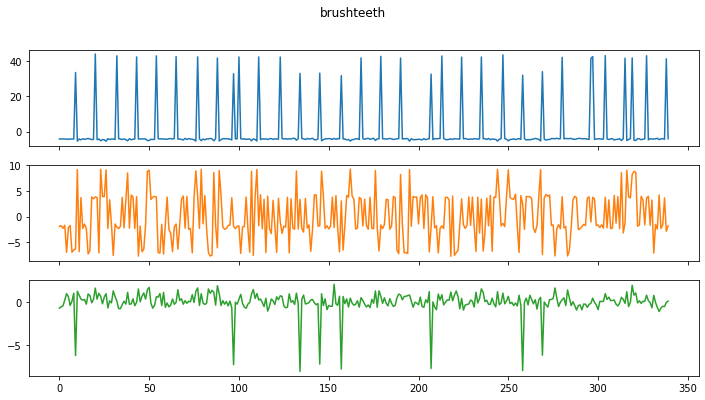

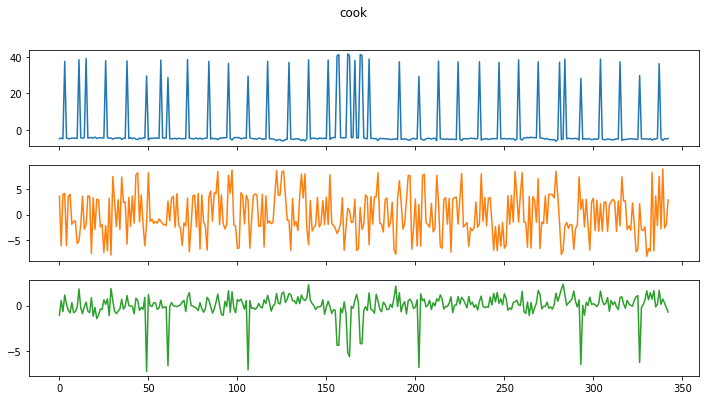

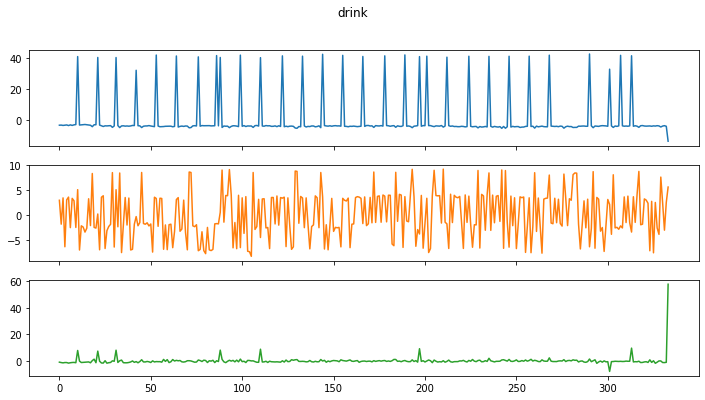

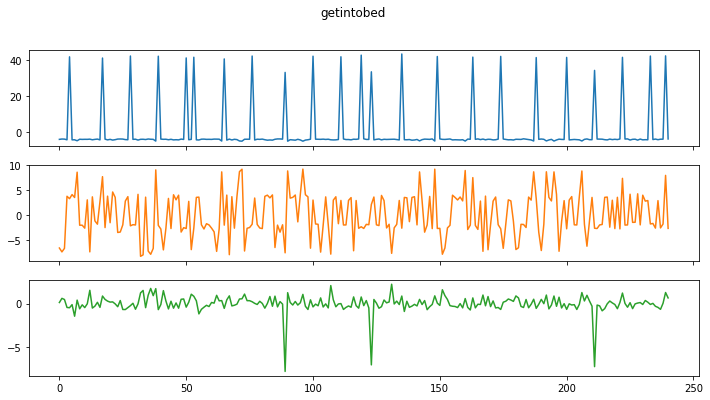

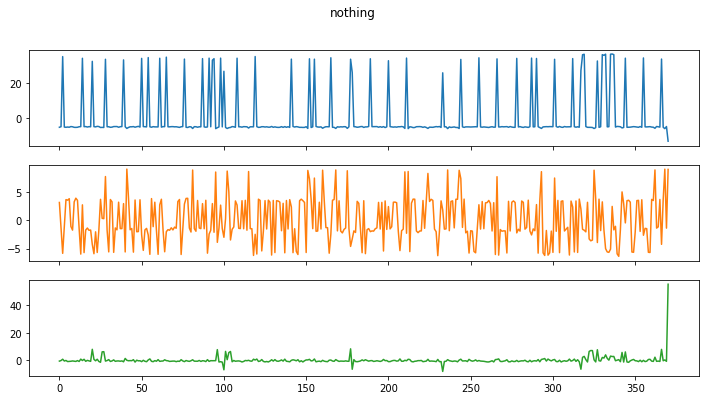

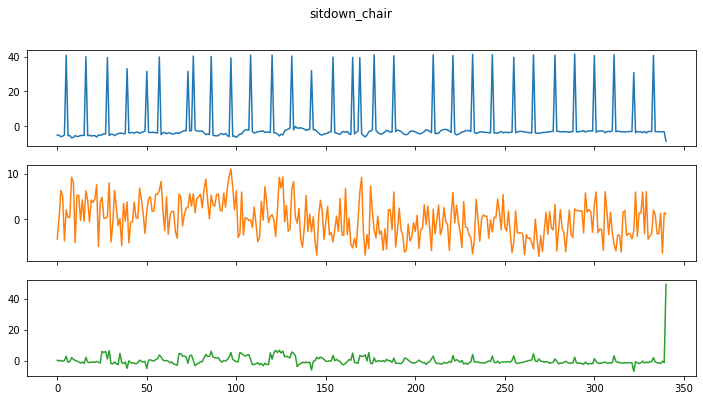

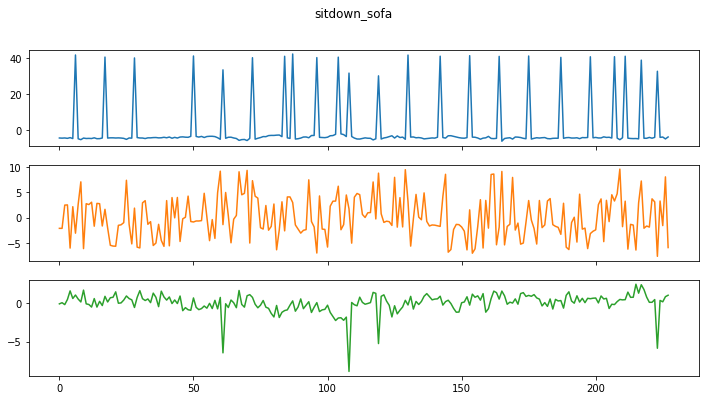

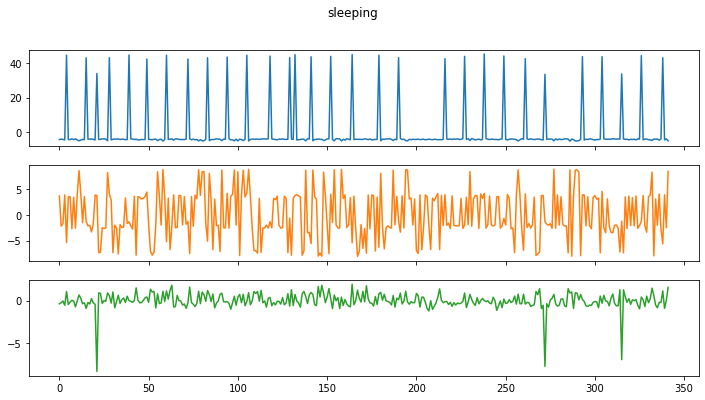

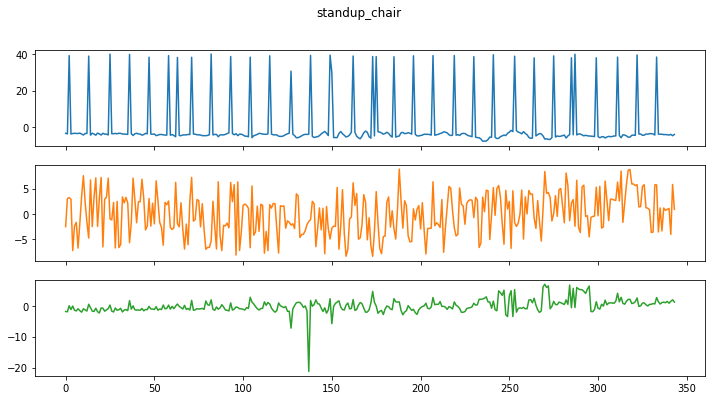

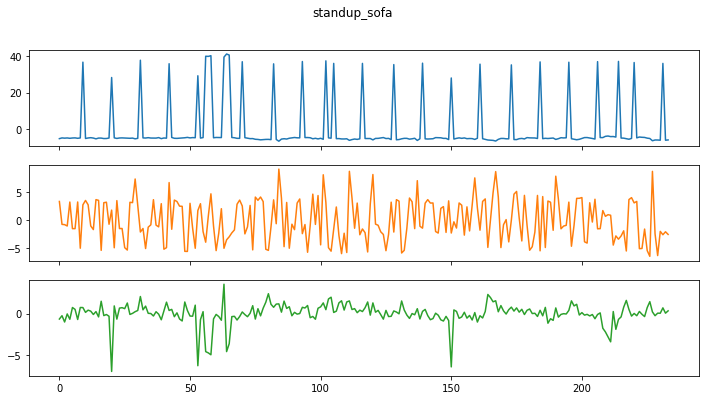

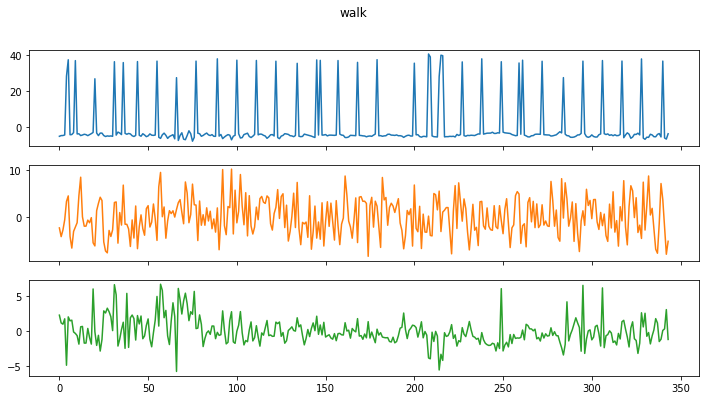

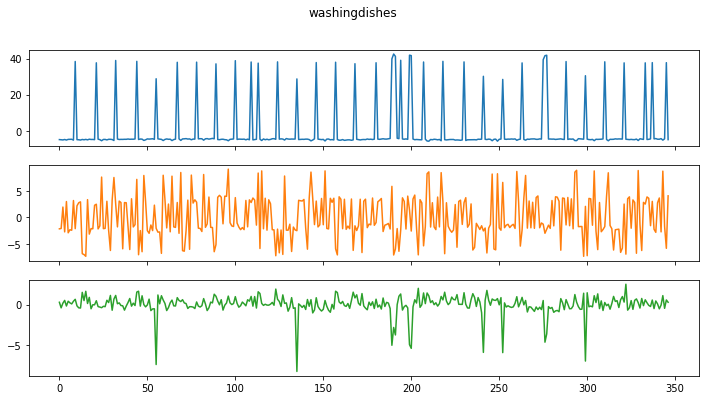

In [8]:
for i, act in enumerate(pca_train):
    act[10].plot.line(figsize=(12, 6), subplots=True, title=actvs[i], legend=False)
    plt.show()

<h3>CWT</h3>

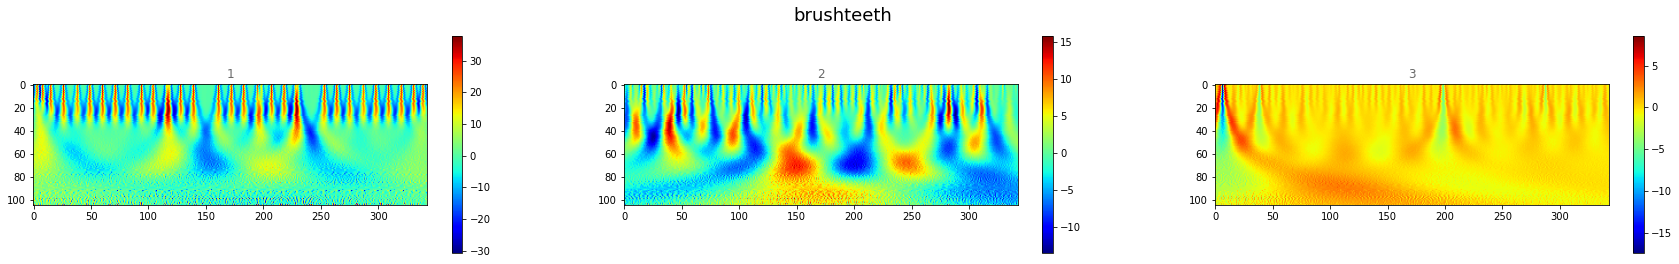

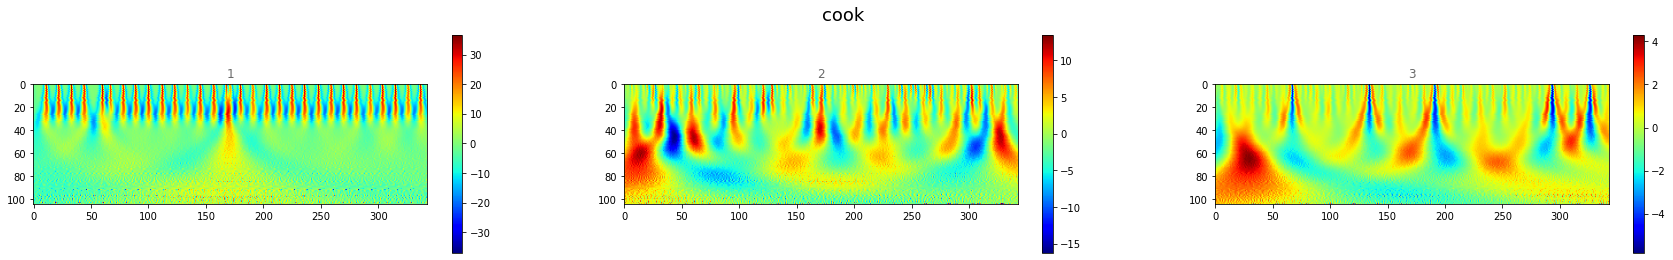

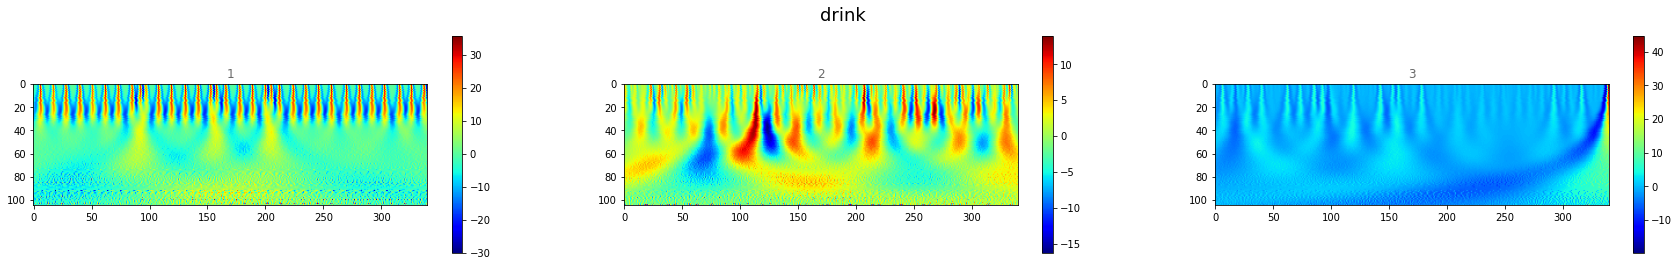

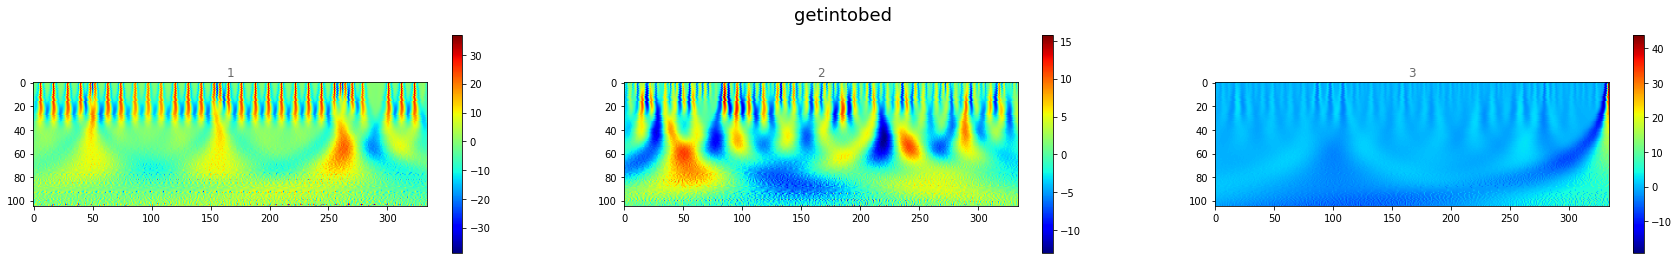

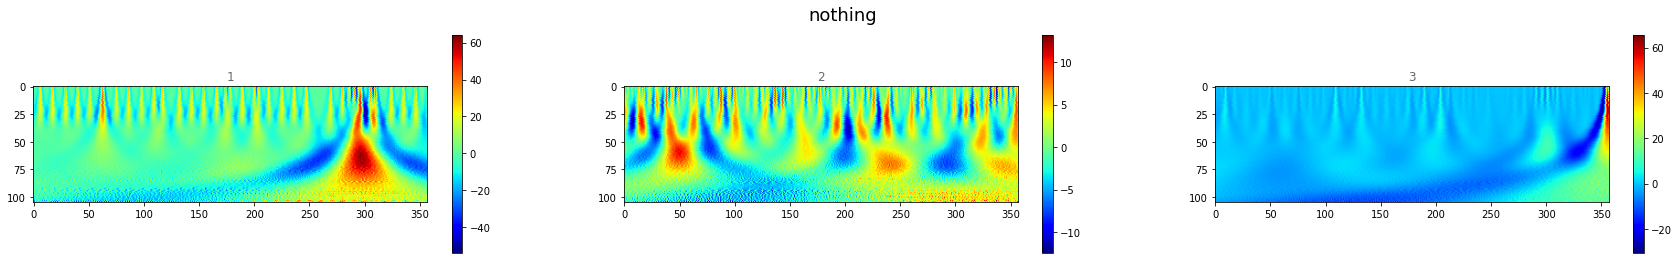

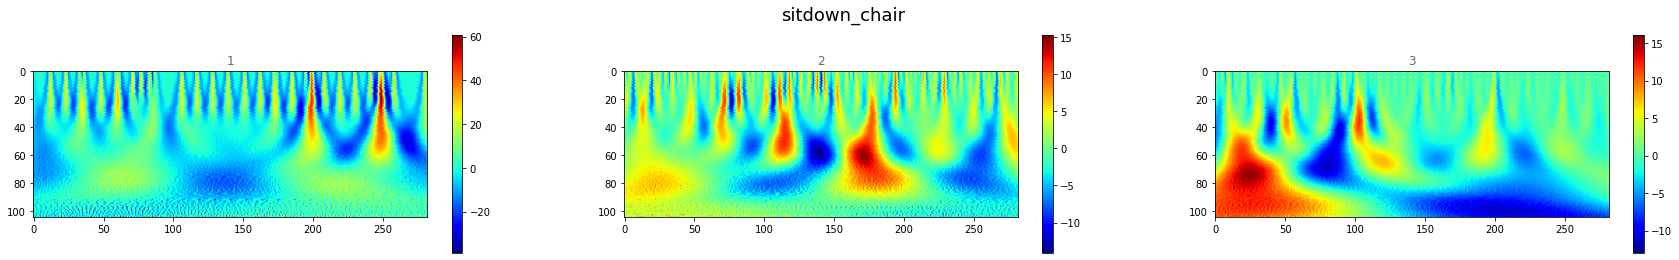

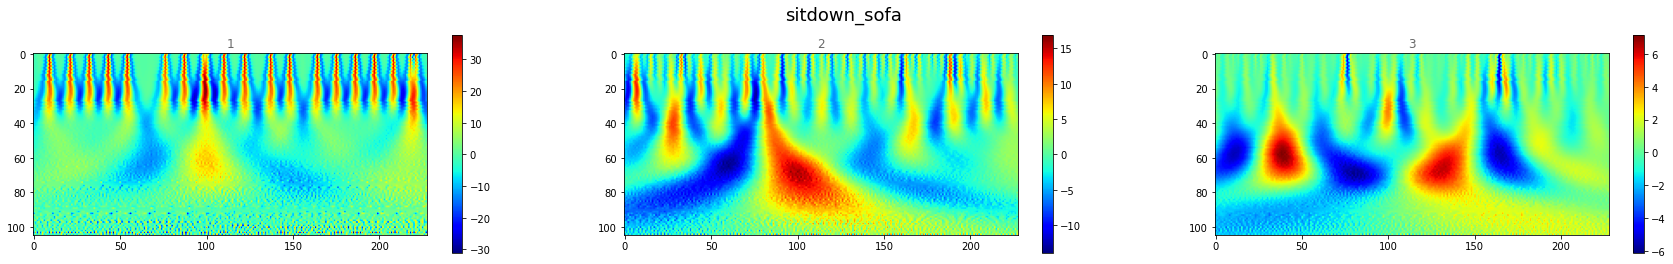

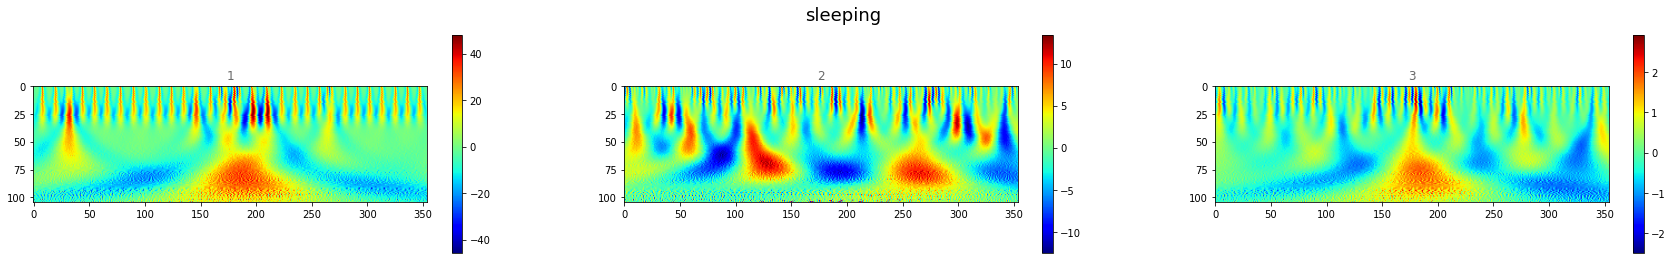

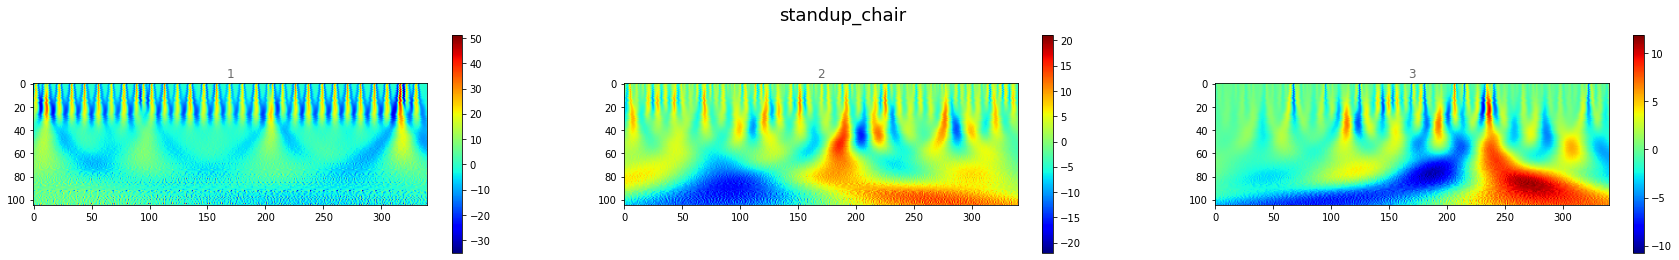

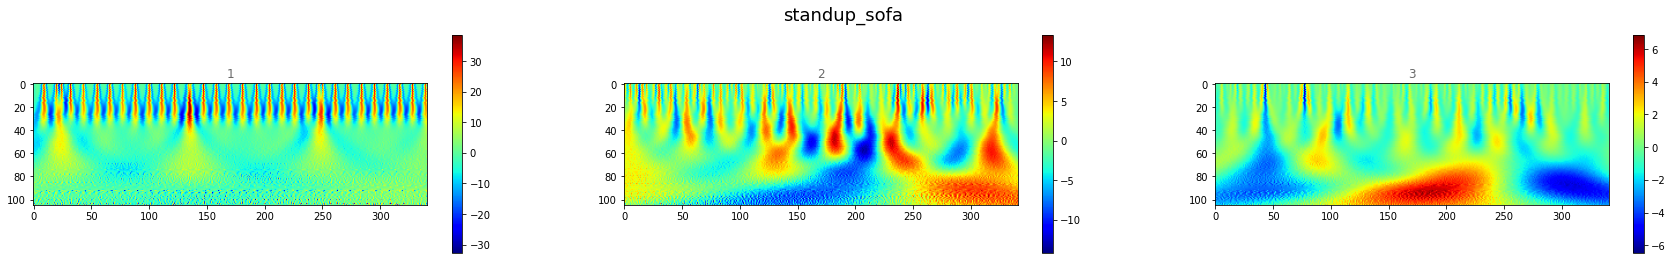

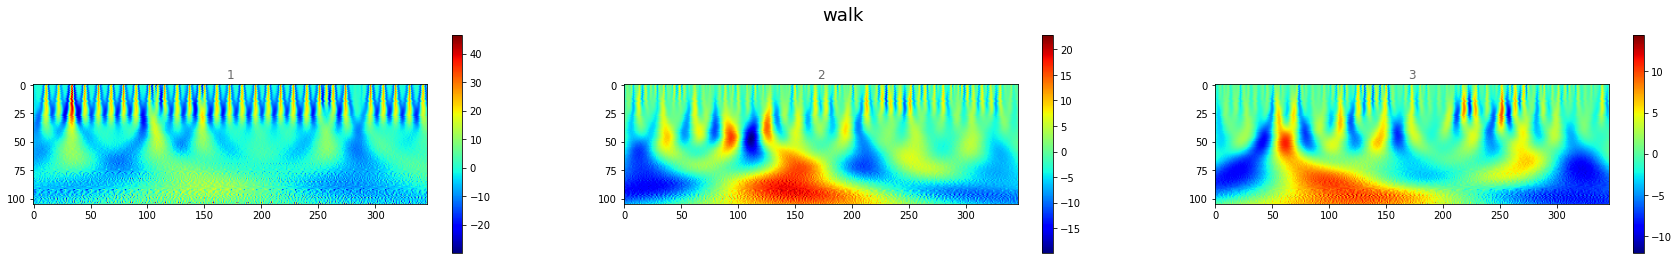

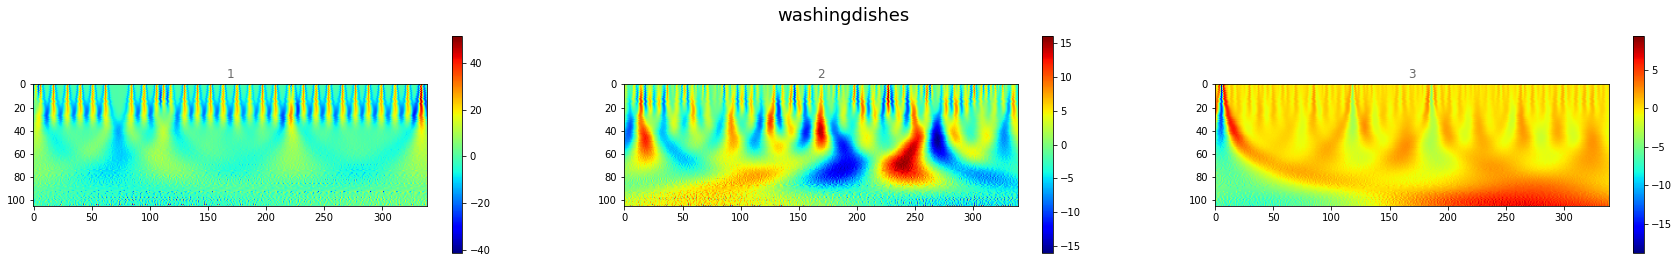

In [51]:
# 100Hz
N = 7
L = 15
scales = [2 ** (n + (l / L)) for n in range(N) for l in range(L)]


for i, act in enumerate(pca_train):
    fig, axs = plt.subplots(1, 3, figsize=(30, 4))
    fig.suptitle(actvs[i], fontsize=18)
    data = act[0]

    for j in range(3):
        coef, freqs = pywt.cwt(data[j], scales=scales, wavelet='mexh')   # wavelet='morl'
        im = axs[j].imshow(coef, cmap='jet')
        axs[j].set_title(j + 1, color='dimgrey')
        cbar = axs[j].figure.colorbar(im, ax=axs[j])
        
    plt.show()